In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [3]:
## Google Colab

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [4]:
import os
from datetime import datetime

In [5]:
from plotly import __version__
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
df = pd.read_csv('MLTempDataset.csv', parse_dates = ['Datetime'])
df = df.drop(['Datetime1', 'Unnamed: 0'], axis=1)
df.head()

,DAYTON_MW,Datetime
0,20.867,2022-01-04 00:00:00
1,21.000,2022-01-04 01:00:00
2,20.867,2022-01-04 02:00:00
3,20.650,2022-01-04 03:00:00
4,20.400,2022-01-04 04:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6676 entries, 0 to 6675
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DAYTON_MW  6676 non-null   float64       
 1   Datetime   6676 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 104.4 KB


In [8]:
df.isnull().sum()

DAYTON_MW    0
Datetime     0
dtype: int64

In [9]:
df = df.set_index('Datetime')
df.head()

,DAYTON_MW
Datetime,
2022-01-04 00:00:00,20.867
2022-01-04 01:00:00,21.000
2022-01-04 02:00:00,20.867
2022-01-04 03:00:00,20.650
2022-01-04 04:00:00,20.400


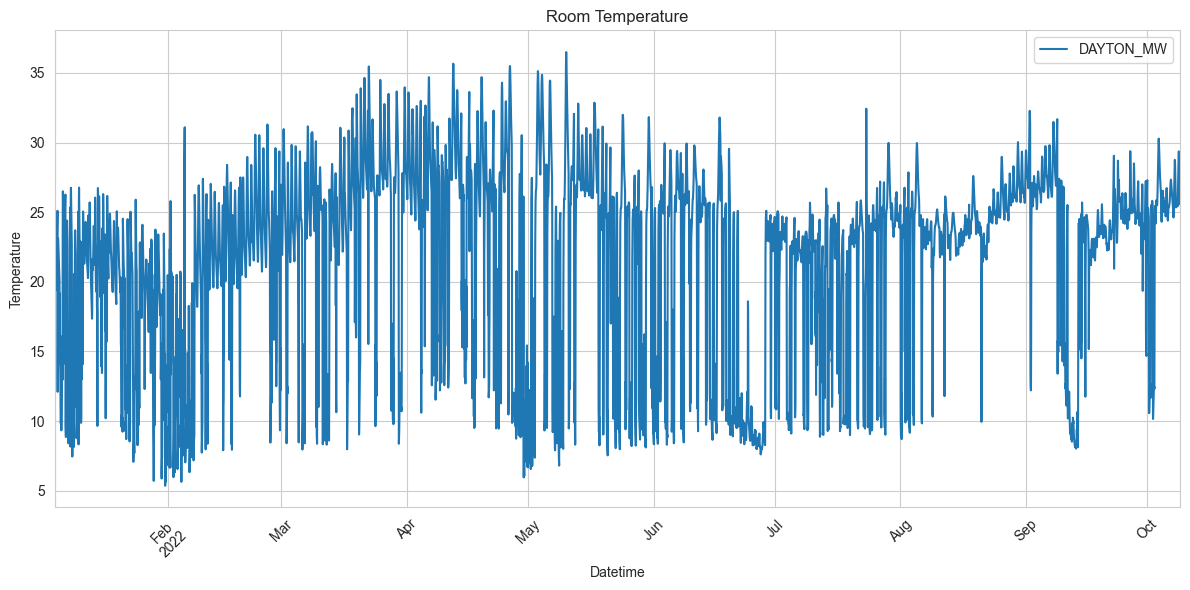

In [10]:
df.plot(figsize=(12, 6))
plt.ylabel('Temperature')
plt.title('Room Temperature')
plt.xticks(rotation=45)
plt.tight_layout()

In [11]:
df = df.resample(rule='D').mean()
df.head()

,DAYTON_MW
Datetime,
2022-01-04,21.064583
2022-01-05,15.375625
2022-01-06,19.591000
2022-01-07,15.544500
2022-01-08,15.779917


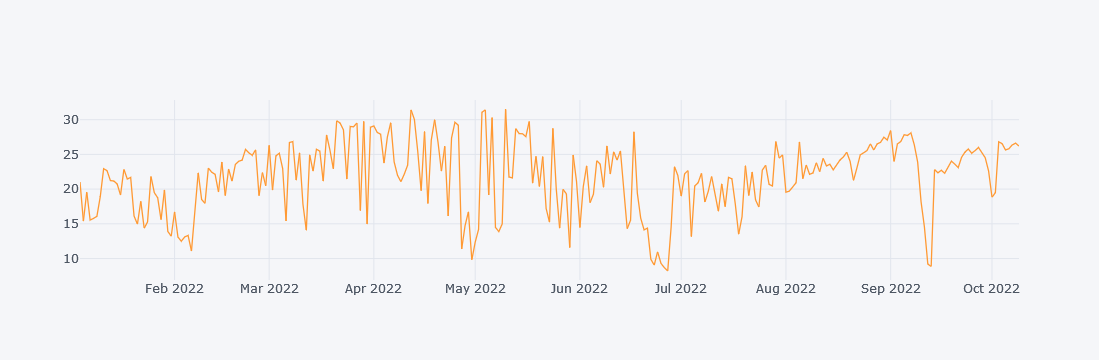

In [12]:
df.iplot()

In [13]:
df.describe()

,DAYTON_MW
count,279.000000
mean,21.749279
std,5.117054
min,8.202833
25%,18.875583
50%,22.427833
75%,25.492333
max,31.541625


In [14]:
df['Mean'] = df.rolling(5).mean()
df.head()

,DAYTON_MW,Mean
Datetime,,
2022-01-04,21.064583,NaN
2022-01-05,15.375625,NaN
2022-01-06,19.591000,NaN
2022-01-07,15.544500,NaN
2022-01-08,15.779917,17.471125


<Axes: xlabel='Datetime'>

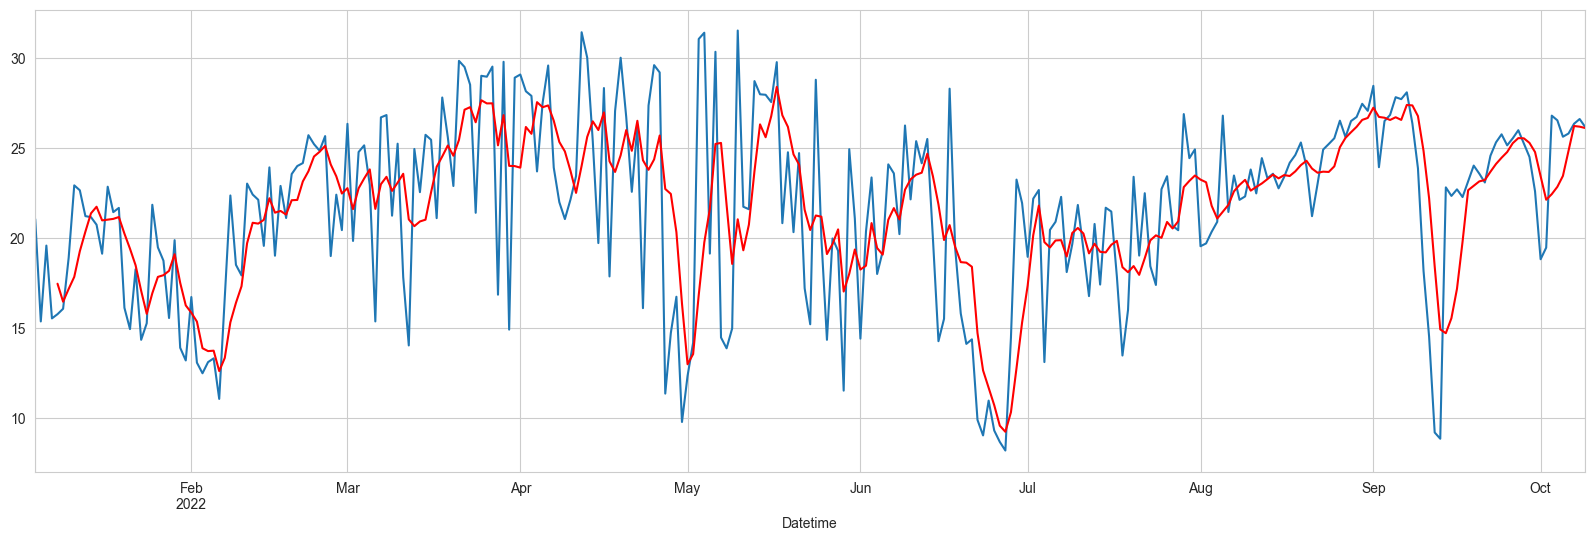

In [15]:
df['DAYTON_MW'].plot(figsize=(20, 6))
df.rolling(5).mean()['DAYTON_MW'].plot(color='red')

<Axes: xlabel='Datetime'>

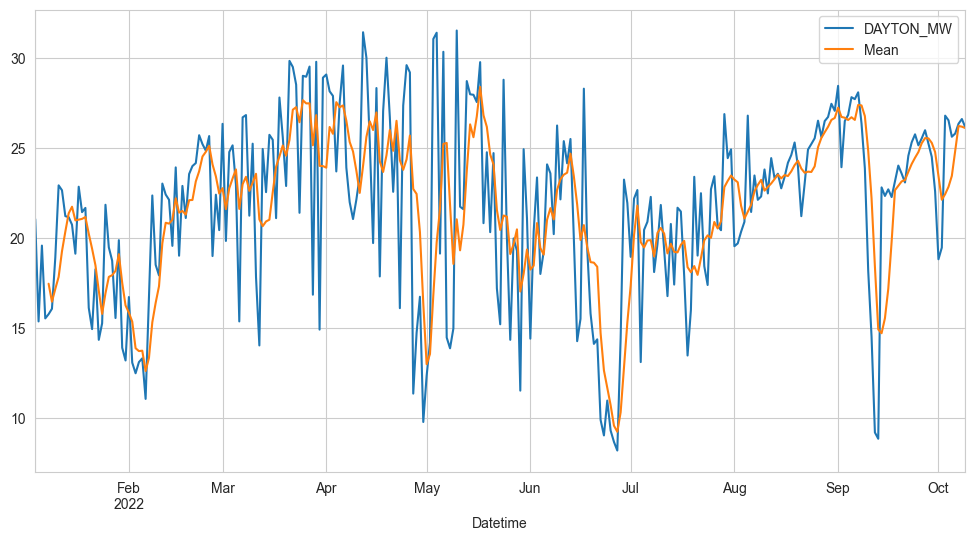

In [16]:
df[['DAYTON_MW', 'Mean']].plot(figsize=(12, 6))

<Axes: xlabel='Datetime'>

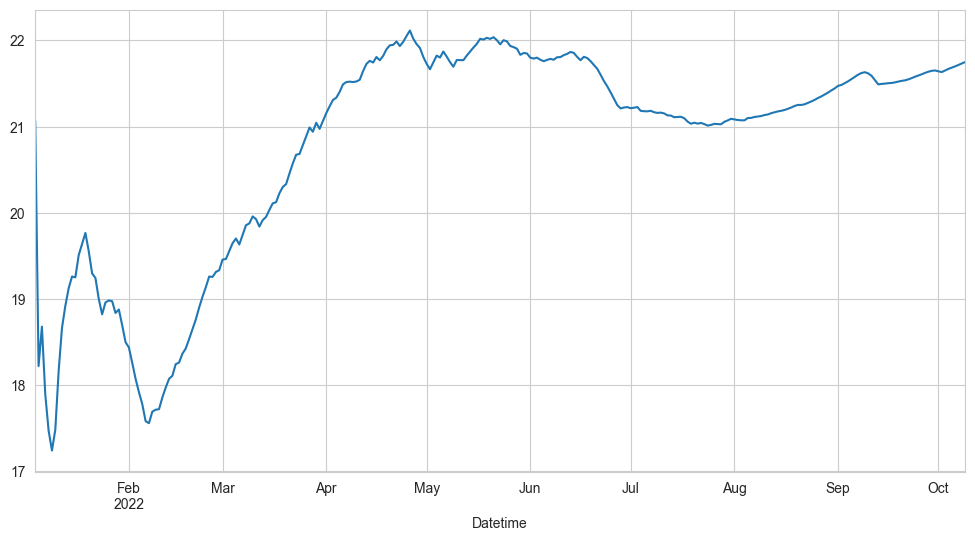

In [17]:
## Expanding
## CMA
df['DAYTON_MW'].expanding().mean().plot(figsize=(12, 6))

In [18]:
df['EMA_True'] = df.iloc[:,0].ewm(span=5).mean()
df['EMA_False'] = df.iloc[:,0].ewm(span=5, adjust=False).mean()

df.head()

,DAYTON_MW,Mean,EMA_True,EMA_False
Datetime,,,,
2022-01-04,21.064583,NaN,21.064583,21.064583
2022-01-05,15.375625,NaN,17.651208,19.168264
2022-01-06,19.591000,NaN,18.570057,19.309176
2022-01-07,15.544500,NaN,17.313287,18.054284
2022-01-08,15.779917,17.471125,16.724647,17.296162


<Axes: xlabel='Datetime'>

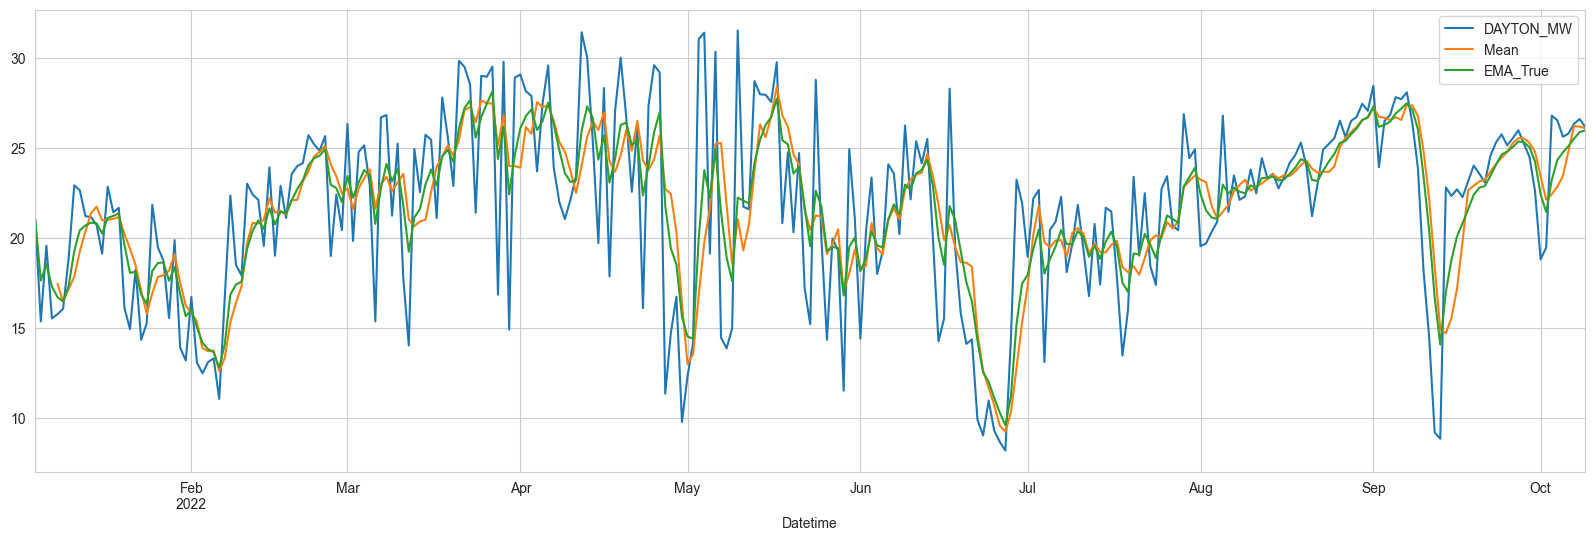

In [19]:
df[['DAYTON_MW','Mean','EMA_True']].plot(figsize=(20,6))

<Axes: xlabel='Datetime'>

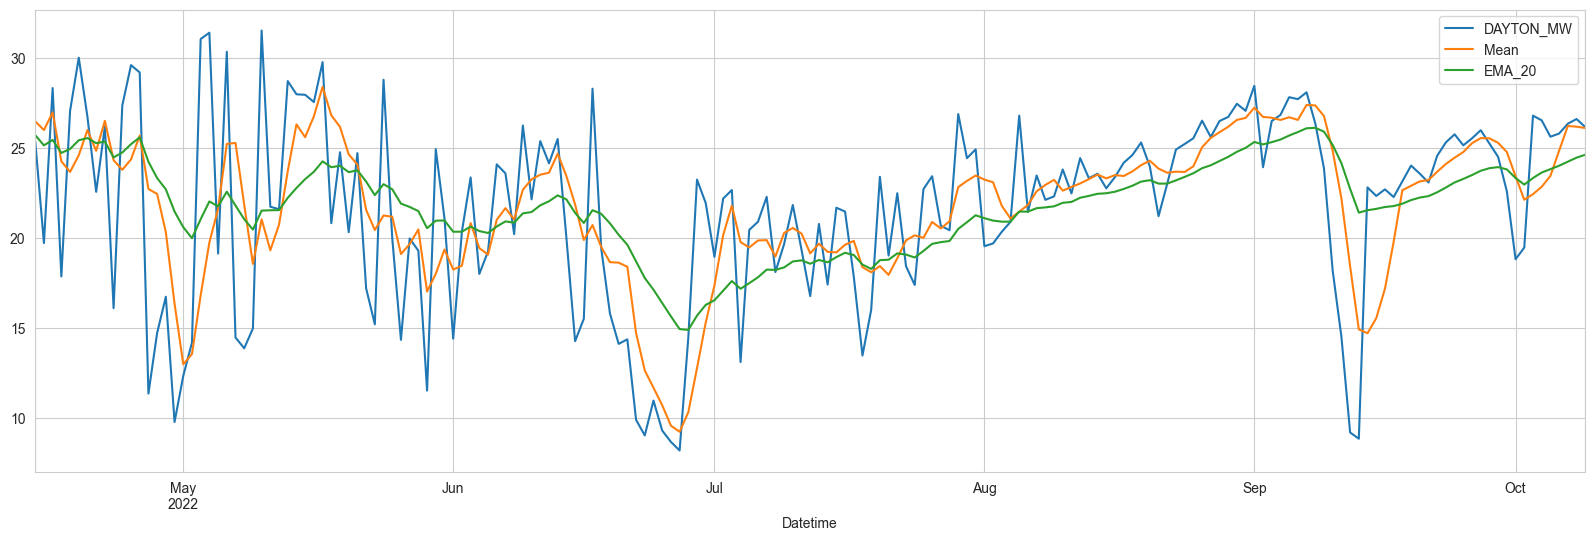

In [20]:
df['EMA_20'] = df.iloc[:,0].ewm(span=20).mean()
df[['DAYTON_MW','Mean','EMA_20']].iloc[100:365].plot(figsize=(20, 6))

In [21]:
#alpha  = 2/(span+1) for span >= 1
2/(5+1)

0.3333333333333333

In [22]:
df['EMA_0.1'] = df.iloc[:,0].ewm(alpha = 0.1).mean()
df['EMA_0.4'] = df.iloc[:,0].ewm(alpha = 0.4).mean()
df['EMA_0.7'] = df.iloc[:,0].ewm(alpha = 0.7).mean()
df['EMA_0.9'] = df.iloc[:,0].ewm(alpha = 0.9).mean()

<Axes: xlabel='Datetime'>

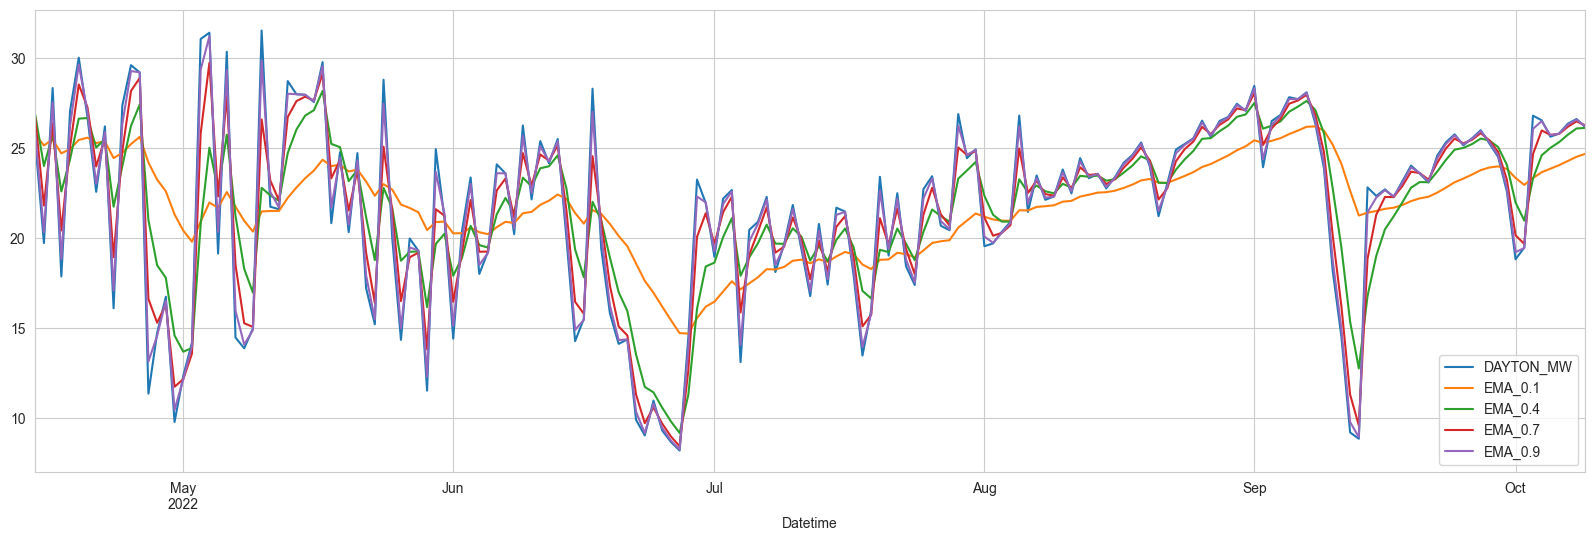

In [23]:
df[['DAYTON_MW','EMA_0.1', 'EMA_0.4', 'EMA_0.7','EMA_0.9']].iloc[100:365].plot(figsize=(20,6))